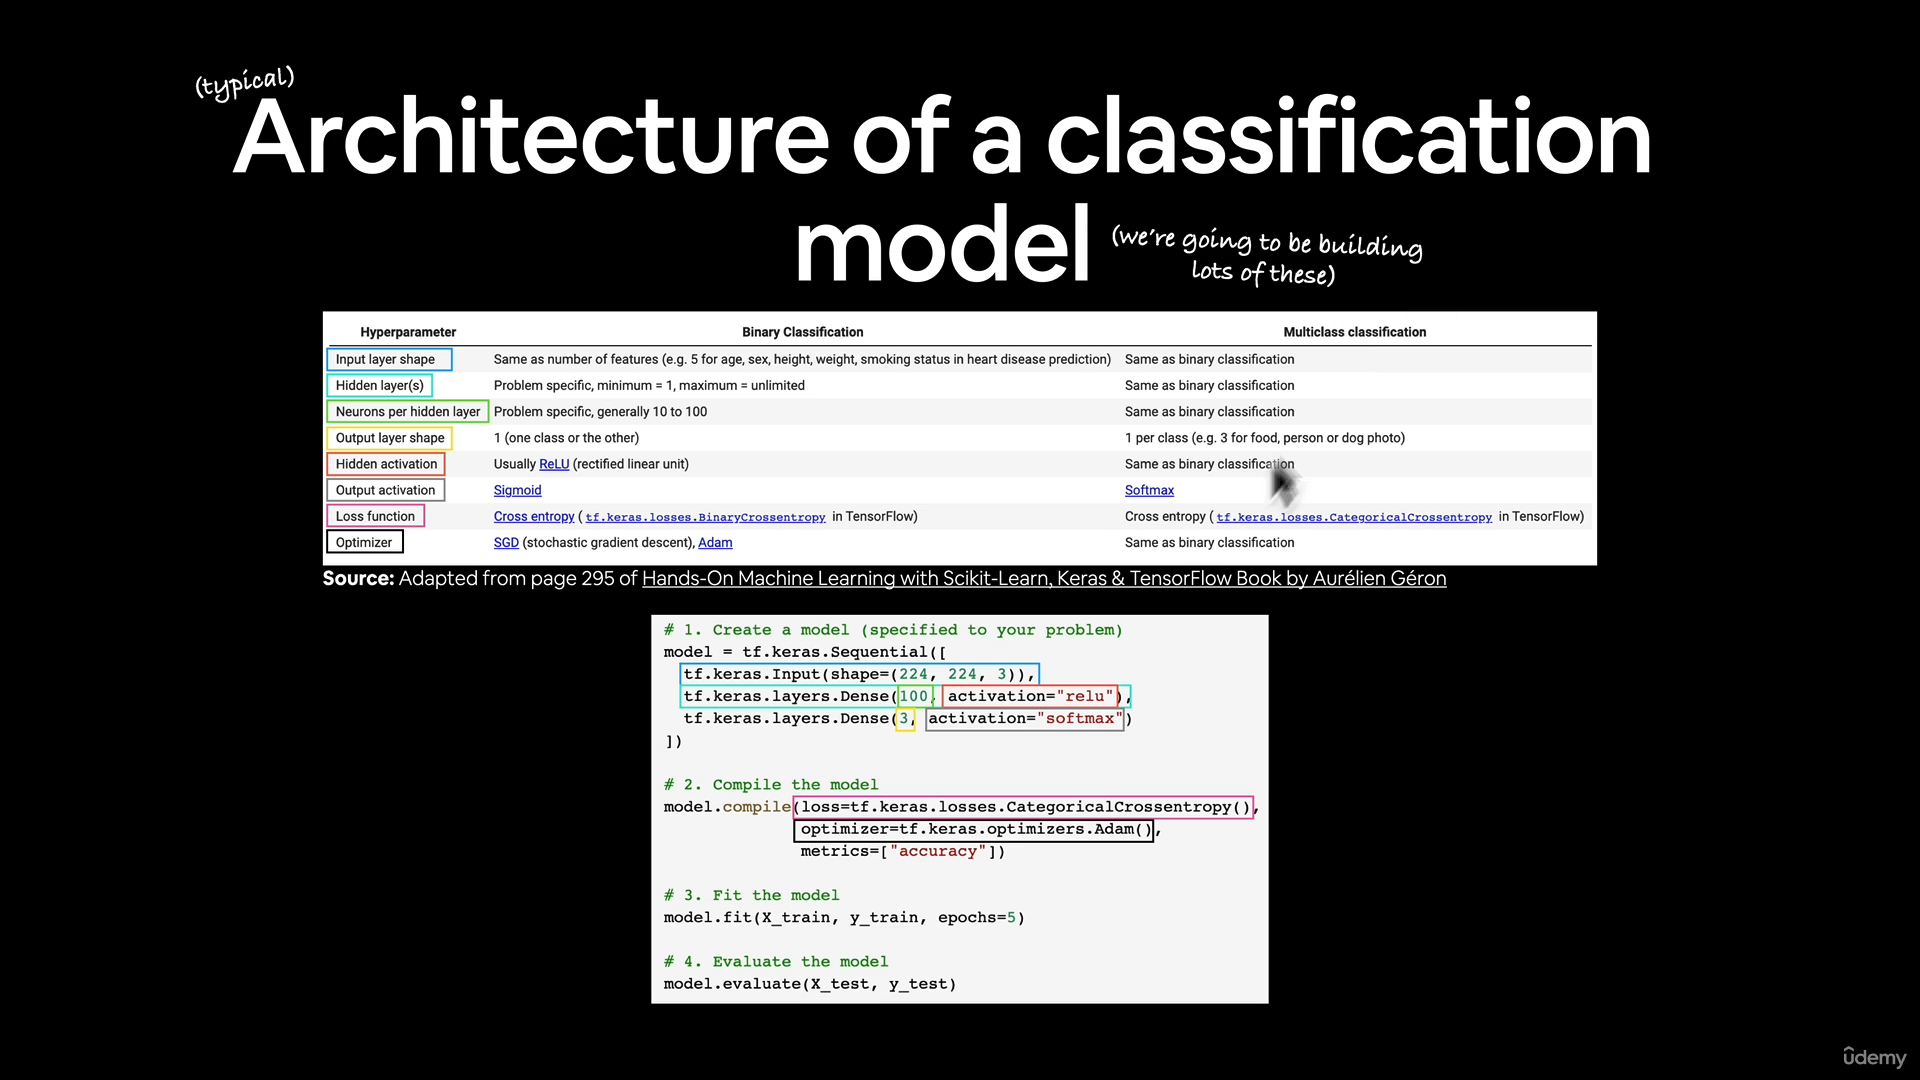

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where we try to classify something as one thing or another

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [24]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [25]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [26]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

 Our data is a little hard to understand right now... Let's visualize it!

In [27]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label": y})
circles

X0        X1  label
0    0.754246  0.231481      1
1   -0.756159  0.153259      1
2   -0.815392  0.173282      1
3   -0.393731  0.692883      1
4    0.442208 -0.896723      0
..        ...       ...    ...
995  0.244054  0.944125      0
996 -0.978655 -0.272373      0
997 -0.136900 -0.810012      1
998  0.670362 -0.767502      0
999  0.281057  0.963824      0

[1000 rows x 3 columns]

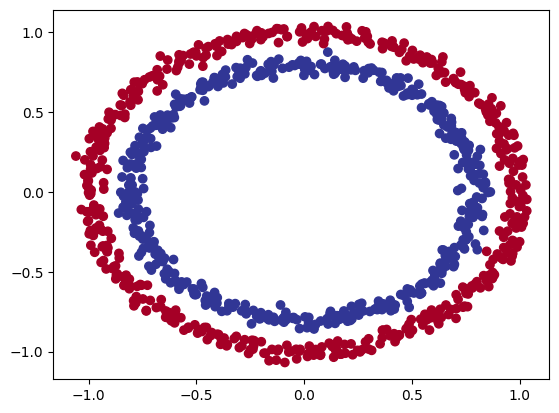

In [28]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [29]:
# Check the shape of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [30]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [31]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

## Steps in modelling

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
# Split the data as train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,
                          activation="relu"),
    tf.keras.layers.Dense(8,
                          activation="relu"),
    tf.keras.layers.Dense(1,
                          activation="sigmoid"),

])

# 2. Compile the model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae", "accuracy"])

# 3. Fit the model
history =  model.fit(X_train_scaled,
                     y_train,
                     validation_data=(X_test_scaled, y_test),
                     epochs=50,
                     batch_size=32)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5182 - loss: 0.7261 - mae: 0.5051 - val_accuracy: 0.4850 - val_loss: 0.7228 - val_mae: 0.5071
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5043 - loss: 0.7112 - mae: 0.5028 - val_accuracy: 0.4800 - val_loss: 0.7110 - val_mae: 0.5046
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5074 - loss: 0.7035 - mae: 0.5014 - val_accuracy: 0.4850 - val_loss: 0.7035 - val_mae: 0.5024
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4910 - loss: 0.6983 - mae: 0.5000 - val_accuracy: 0.4900 - val_loss: 0.6984 - val_mae: 0.5006
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4784 - loss: 0.6945 - mae: 0.4987 - val_accuracy: 0.4900 - val_loss: 0.6948 - val_mae: 0.4992
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4743 - loss: 0.6913 - mae: 0.4974 - val_accuracy: 0.5050 - val_loss: 0.6922 - val_mae: 0.4981
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/s

In [33]:
# Evaluate the model
model.evaluate(X_test_scaled, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.2040 - mae: 0.1797 


[0.21109266579151154, 0.18522852659225464, 1.0]

Text(0, 0.5, 'loss')

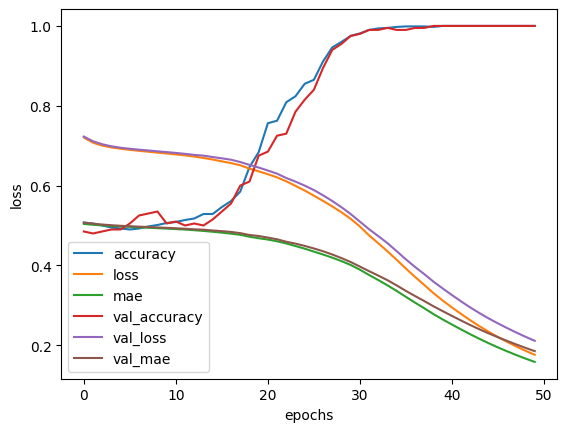

In [34]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

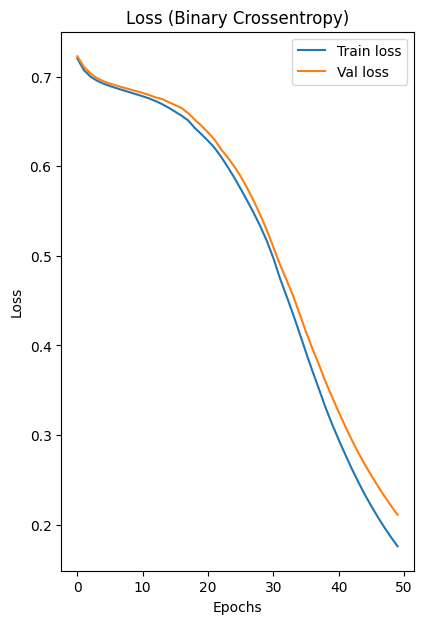

In [35]:
plt.figure(figsize=(10, 7))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Val loss")
plt.title("Loss (Binary Crossentropy)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

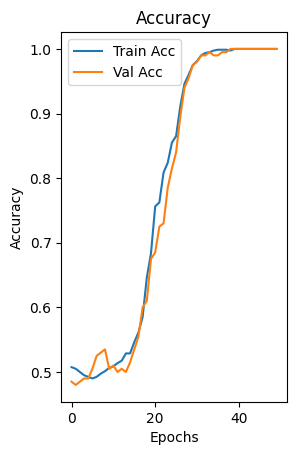

In [36]:
# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the modl
5. Tweak
6. Evaluate...

In [37]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4855 - loss: 6.6146   
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4928 - loss: 6.8411 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336 


In [38]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 8.1322   


[8.059046745300293, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performinf as if it's guessing.

So let's step things up a notch and add an extra layer.

In [39]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy", "mae"])
# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [40]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 0.6931 - mae: 0.4999  


[0.6932876110076904, 0.5, 0.5000007152557373]

In [41]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

## Improving our model
Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might want to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [42]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy", "mae", "mse"])

# 3.Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [43]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5125 - loss: 0.6914 - mae: 0.4980 - mse: 0.2491  


[0.6952800750732422,
 0.492000013589859,
 0.5000180006027222,
 0.25107091665267944]

To visualize our model's predictions , let's create a function `plot_decision_boundary`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Plot the predictions as well as a line between zones (where each unique class falls)

In [44]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")

    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


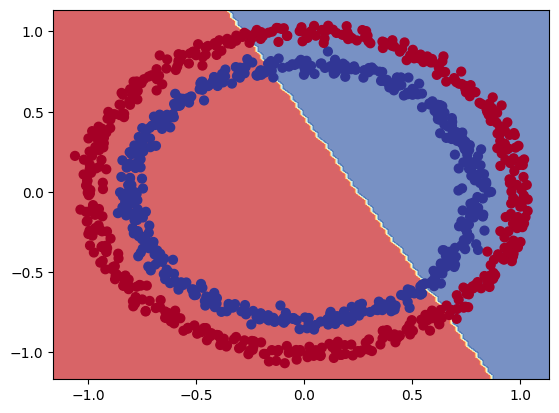

In [45]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X=X, y=y)

In [46]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_regression_train = X_regression[:150]
X_regression_test = X_regression[150:]
y_regression_train = y_regression[:150]
y_regression_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_regression_train, axis=-1), y_regression_train, epochs=100)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_15" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

Oh wait... we compiled our model for a binary classification problem.

But... we're working on a regression problem right now. Let's change the model to suit our data.

In [47]:
# Set the random seed
tf.random.set_seed(42)

# 1. Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse", "accuracy"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_regression_train, axis=-1), y_regression_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0000e+00 - loss: 529.8596 - mae: 529.8596 - mse: 340202.5625
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 410.5383 - mae: 410.5383 - mse: 200237.6875 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 291.0924 - mae: 291.0924 - mse: 97567.8906  
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 169.5139 - mae: 169.5139 - mse: 31553.3438 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 56.8091 - mae: 56.8091 - mse: 3964.2981 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 78.9747 - mae: 78.9747 - mse: 9031.8594 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 84.3854 - mae: 84.3854 - mse: 10335.2500 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 53.7817 - mae: 53.7817 - mse: 4039.1577 
Epoch 9/100
5/5 ━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


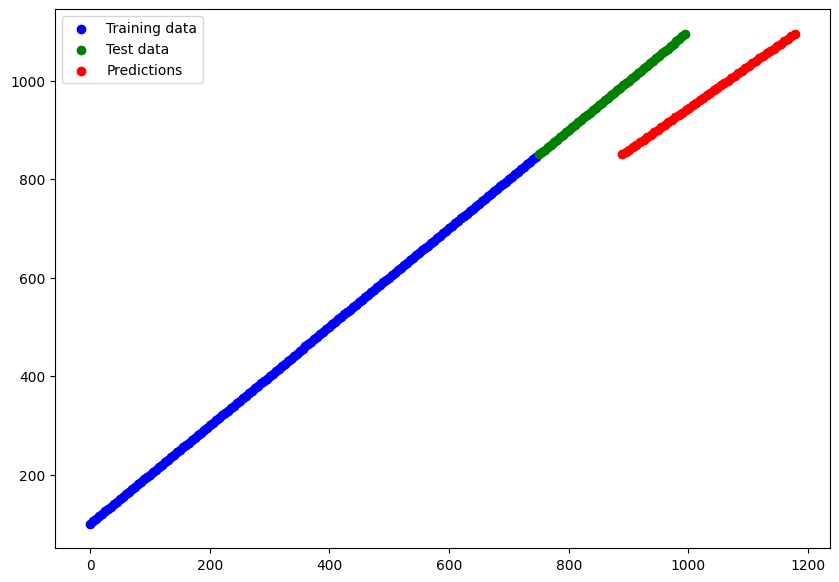

In [48]:
# Make predictions with our trained model
y_regression_predictions = model_3.predict(X_regression_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_regression_train, y_regression_train, c="b", label="Training data")
plt.scatter(X_regression_test, y_regression_test, c="g", label="Test data")
plt.scatter(y_regression_predictions, y_regression_test, c="r", label="Predictions")
plt.legend()


## The missing piece: Non-linearity

In [49]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4201 - loss: 4.5408
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4292 - loss: 4.4959
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4346 - loss: 4.3868
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4427 - loss: 4.3221
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4491 - loss: 4.2509 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4516 - loss: 4.2225 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4530 - loss: 4.0641 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4548 - loss: 4.0010 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4579 - loss: 3.9194 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4579 - loss: 3.9108 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4631 - loss: 3.8362 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

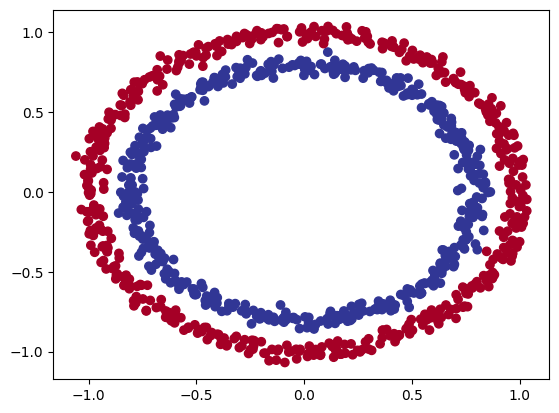

In [50]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classification


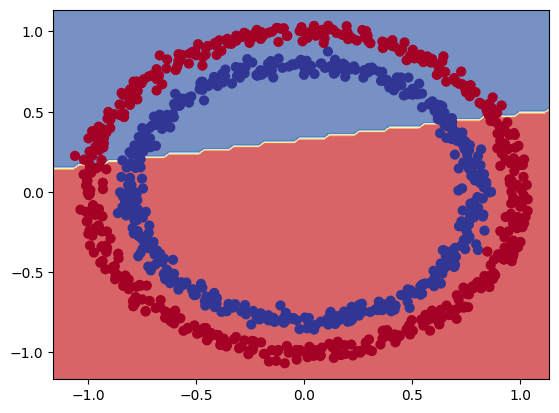

In [51]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

In [52]:
# Set the random seed
tf.random.set_seed(42)

# 1. Build the model
relu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
relu_model.compile(loss="binary_crossentropy",
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   metrics=["accuracy"])

# 3. Fit the model
history_relu_model = relu_model.fit(X, y, epochs=200, verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


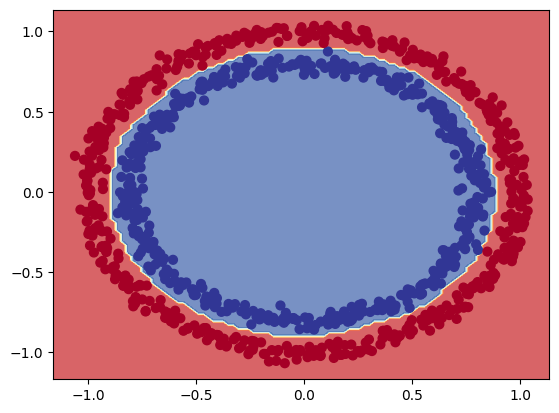

In [53]:
plot_decision_boundary(model=relu_model,
                       X=X,
                       y=y)

In [54]:
# Set the random seed
tf.random.set_seed(42)

# 1. Build the model
sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="sigmoid"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
sigmoid_model.compile(loss="binary_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      metrics=["accuracy"])

# 3. Fit the model
history_sigmoid_model = sigmoid_model.fit(X, y, epochs=200, verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


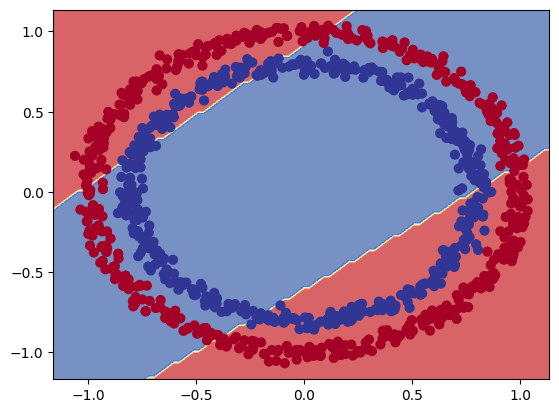

In [55]:
plot_decision_boundary(model=sigmoid_model,
                       X=X,
                       y=y)

In [56]:
# Set the random seed
tf.random.set_seed(42)

# 1. Build the model
tanh_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="tanh"),
    tf.keras.layers.Dense(10, activation="tanh"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
tanh_model.compile(loss="binary_crossentropy",
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   metrics=["accuracy"])

# 3. Fit the model
history_tanh_model = tanh_model.fit(X, y, epochs=100, verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


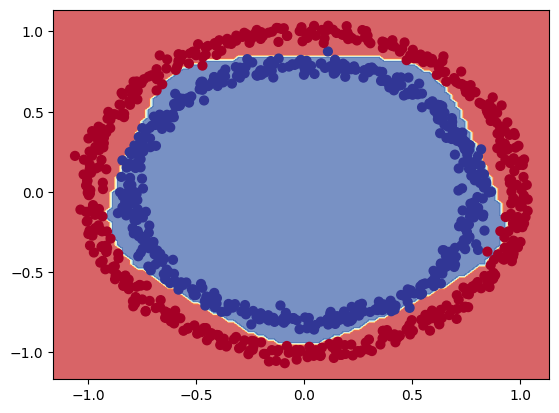

In [57]:
plot_decision_boundary(model=tanh_model,
                       X=X,
                       y=y)

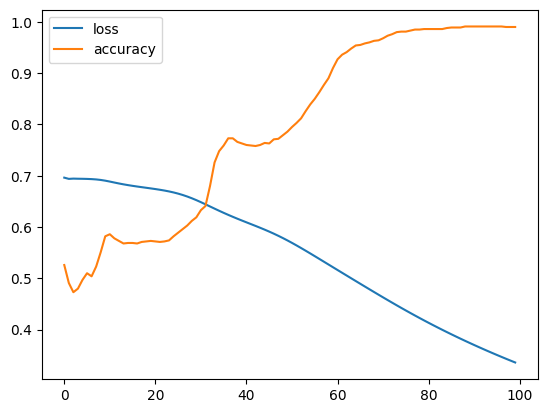

In [58]:
history_tanh = pd.DataFrame(history_tanh_model.history)
history_relu = pd.DataFrame(history_relu_model.history)
history_sigmoid = pd.DataFrame(history_sigmoid_model.history)

plt.plot(history_tanh["loss"], label="loss")
plt.plot(history_tanh["accuracy"], label="accuracy")
plt.legend()

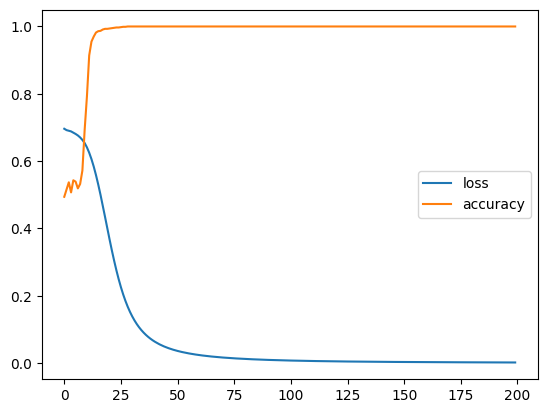

In [59]:
plt.plot(history_relu["loss"], label="loss")
plt.plot(history_relu["accuracy"], label="accuracy")
plt.legend()

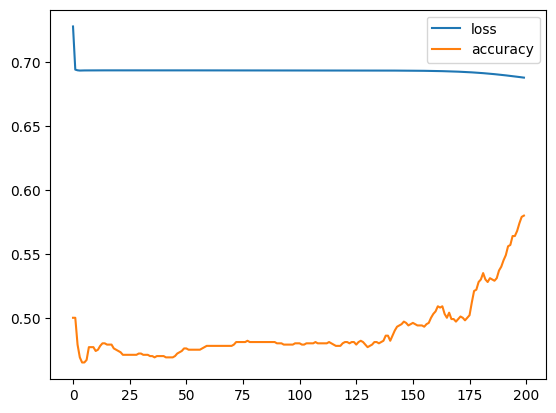

In [60]:
plt.plot(history_sigmoid["loss"], label="loss")
plt.plot(history_sigmoid["accuracy"], label="accuracy")
plt.legend()

Let's try build our first neural network with a non-linear activation function.

In [61]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4469 - loss: 6.0449
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4419 - loss: 5.9912 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4380 - loss: 5.8832
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4388 - loss: 5.8455 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4400 - loss: 5.7808 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4399 - loss: 5.6658 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4361 - loss: 5.4361
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4422 - loss: 5.2959
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4395 - loss: 5.1418
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4386 - loss: 5.0884
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4408 - loss: 5.0716
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accur

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step
doing binary classification


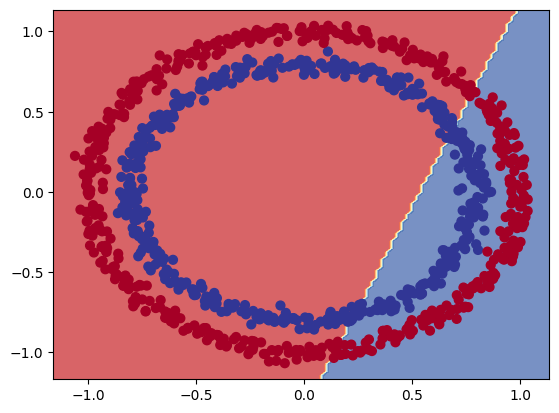

In [62]:
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

In [63]:
# Time to replicate the multi-layer neural network from TensorFlow playgorund in code

# Set the random seed
tf.random.set_seed(42)

# 1. Build the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

#3. Fit the model
model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5193 - loss: 0.7100
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5084 - loss: 0.7059 
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4611 - loss: 0.7036 
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4666 - loss: 0.7022
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4491 - loss: 0.7011 
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4481 - loss: 0.7003 
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4420 - loss: 0.6995 
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4316 - loss: 0.6988 
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4159 - loss: 0.6981 
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4019 - loss: 0.6974 
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4342 - loss: 0.6967 
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

In [64]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9839 - loss: 0.0923  


[0.09156645089387894, 0.984000027179718]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classification


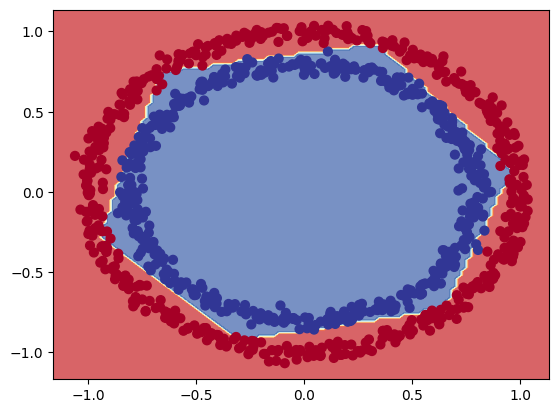

In [65]:
plot_decision_boundary(model_6,
                       X=X,
                       y=y)

In [66]:
# Set the random seed
tf.random.set_seed(42)

# 1. Build the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5021 - loss: 0.6968
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4998 - loss: 0.6957
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4923 - loss: 0.6954 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5172 - loss: 0.6949 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5015 - loss: 0.6943
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5007 - loss: 0.6938
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5022 - loss: 0.6932 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5019 - loss: 0.6927 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5026 - loss: 0.6921
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5030 - loss: 0.6916 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5021 - loss: 0.6910 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc

In [67]:
# 4. Evaluate our model
model_7.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9429 - loss: 0.3877  


[0.3827374279499054, 0.9449999928474426]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


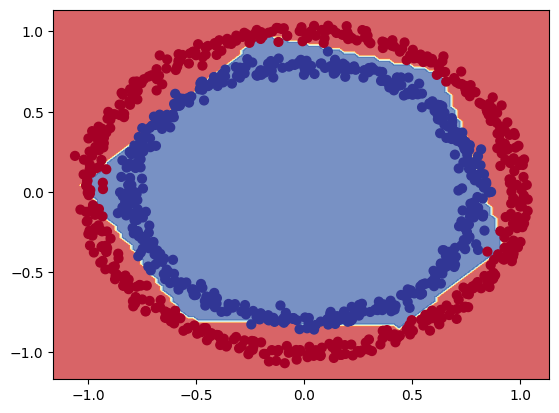

In [68]:
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

In [69]:
# Create a toy tensor (similar to the data we pass into our models)
A =tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

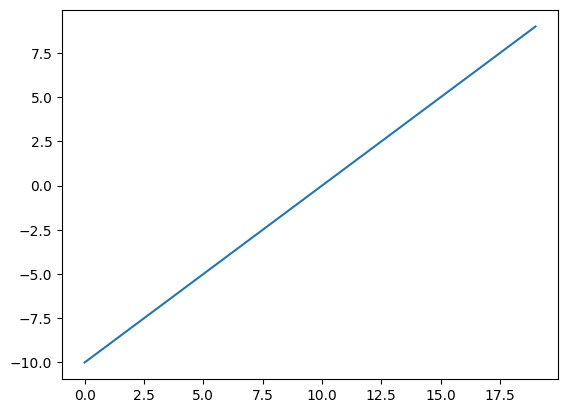

In [70]:
# Visualize our toy data
plt.plot(A)

In [71]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

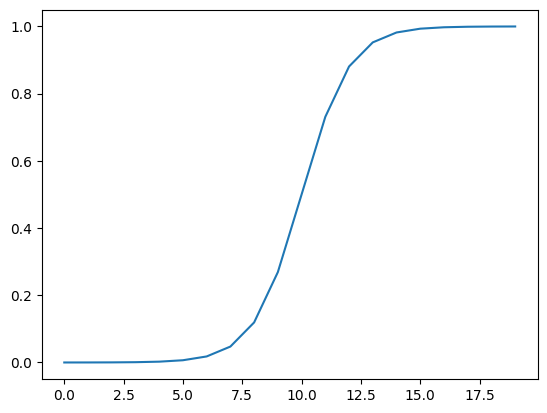

In [72]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [73]:
# Let's create the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [74]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

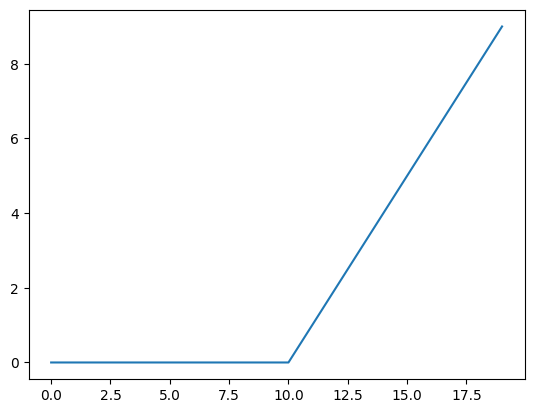

In [75]:
# Plot ReLU-modified tensor
plt.plot(relu(A))

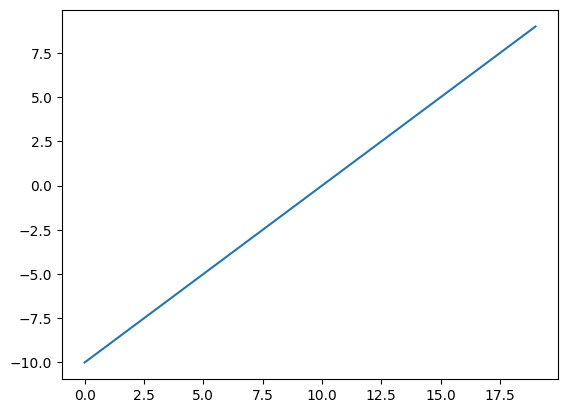

In [76]:
plt.plot(A)

In [77]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

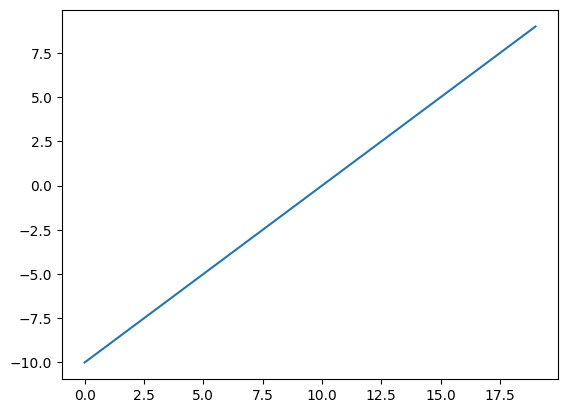

In [78]:
# Does the linear activation change anything?
plt.plot(tf.keras.activations.linear(A))

In [79]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we've been training and testing on the same dataaset...

However, in machine learning this is basically

So let's create a training and test set.

In [80]:
# Check how many examples we have
len(X)

1000

In [81]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [82]:
# Split into train and test sets
X_train, y_train, = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [83]:
# Let' recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model(same as model_7)
model_8 = tf.keras.Sequential([

    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

 # 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4710 - loss: 0.6909
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5351 - loss: 0.6876
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5273 - loss: 0.6818
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5185 - loss: 0.6774
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5279 - loss: 0.6695
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5507 - loss: 0.6591
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5984 - loss: 0.6467
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6101 - loss: 0.6365  
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6294 - loss: 0.6256 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6473 - loss: 0.6133 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6760 - loss: 0.5991 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7055

In [84]:
# 4. Evaluate the model on test dataset
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7866 - loss: 0.4474  


[0.44855645298957825, 0.7699999809265137]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classification


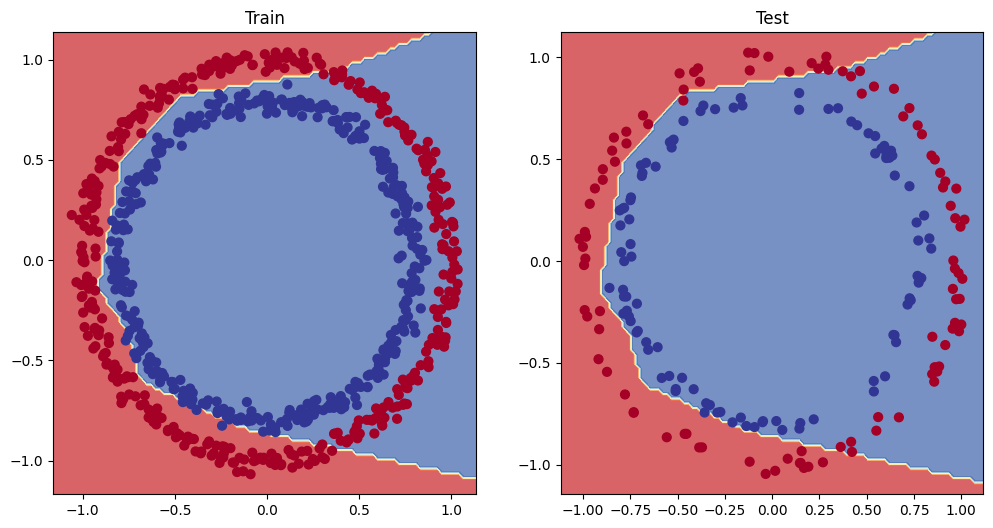

In [85]:
# Plot th edecision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_8, X=X_test, y=y_test)


## Plot the loss (or training) curves

In [86]:
history.history

{'accuracy': [0.48500001430511475,
  0.5362499952316284,
  0.5600000023841858,
  0.5562499761581421,
  0.5625,
  0.6000000238418579,
  0.6287500262260437,
  0.6399999856948853,
  0.65625,
  0.6700000166893005,
  0.6937500238418579,
  0.7137500047683716,
  0.7174999713897705,
  0.7137500047683716,
  0.71875,
  0.7250000238418579,
  0.7275000214576721,
  0.7450000047683716,
  0.7487499713897705,
  0.7612500190734863,
  0.7712500095367432,
  0.7787500023841858,
  0.7850000262260437,
  0.7975000143051147,
  0.7987499833106995],
 'loss': [0.6907733678817749,
  0.6868183016777039,
  0.6789705753326416,
  0.6715158820152283,
  0.6616799235343933,
  0.6498042941093445,
  0.6363102197647095,
  0.6244285106658936,
  0.6121264696121216,
  0.5992116928100586,
  0.5842179656028748,
  0.566328763961792,
  0.5497388243675232,
  0.5345866084098816,
  0.5198048949241638,
  0.5077959299087524,
  0.496821790933609,
  0.48553740978240967,
  0.4755066931247711,
  0.46364229917526245,
  0.4541735053062439,


In [87]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

accuracy      loss
0    0.48500  0.690773
1    0.53625  0.686818
2    0.56000  0.678971
3    0.55625  0.671516
4    0.56250  0.661680
5    0.60000  0.649804
6    0.62875  0.636310
7    0.64000  0.624429
8    0.65625  0.612126
9    0.67000  0.599212
10   0.69375  0.584218
11   0.71375  0.566329
12   0.71750  0.549739
13   0.71375  0.534587
14   0.71875  0.519805
15   0.72500  0.507796
16   0.72750  0.496822
17   0.74500  0.485537
18   0.74875  0.475507
19   0.76125  0.463642
20   0.77125  0.454174
21   0.77875  0.444634
22   0.78500  0.436030
23   0.79750  0.427751
24   0.79875  0.415843

Text(0.5, 1.0, 'Model_8 loss curves')

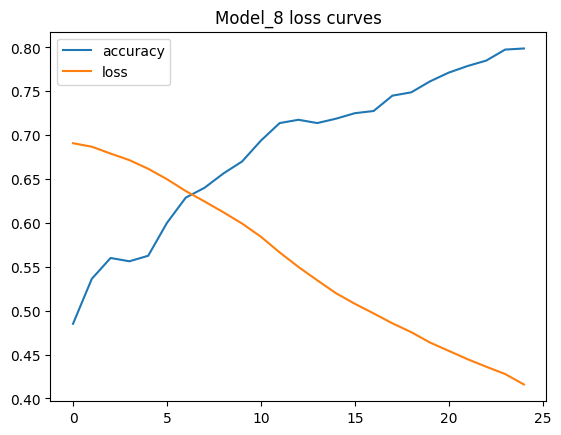

In [88]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - we can think of a callback as an extra piece of functionality, we can add to our model *while* its training.
* Another model (we could use same one as above, but we're practicing building models up here)
* A modified loss curves plot.

In [89]:
# Set random seed
tf.random.set_seed(42)

# 1. Build the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Create a learning rate callback
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))

# 3. Fit the model
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[learning_rate_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5076 - loss: 0.6894 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5128 - loss: 0.6893 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5165 - loss: 0.6892 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5165 - loss: 0.6891 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5058 - loss: 0.6890 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5063 - loss: 0.6889 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5084 - loss: 0.6888 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5084 - loss: 0.6886 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5096 - loss: 0.6885 - learning_

<Axes: xlabel='epochs'>

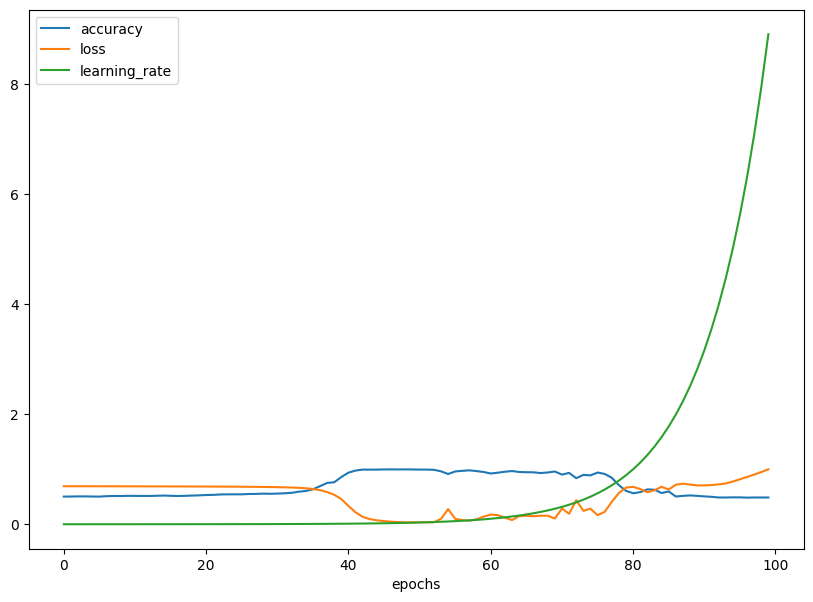

In [90]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate vs Loss')

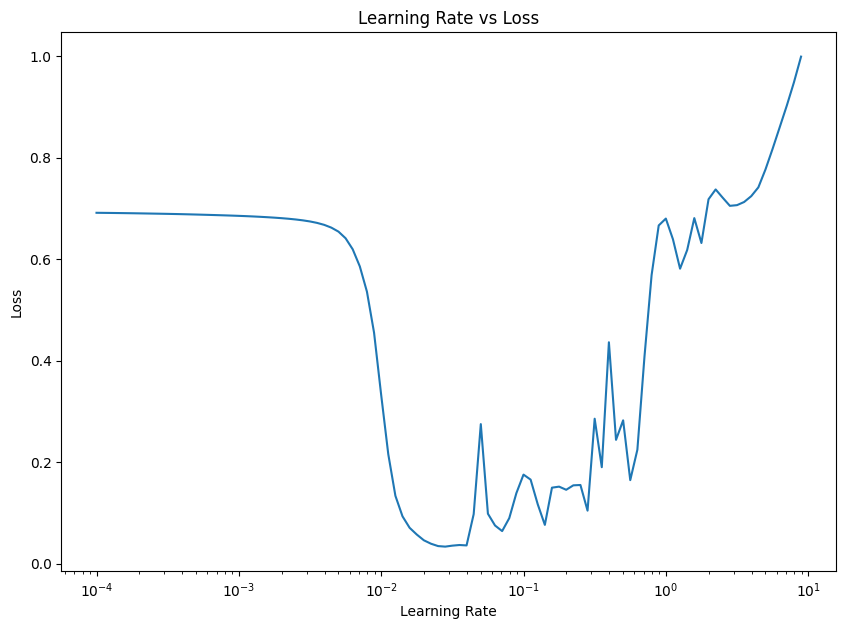

In [91]:
# Plot the learning rate versus the loss
learning_rates = 1e-4 * (10 ** (tf.range(100) / 20))
plt.figure(figsize=(10,7))
plt.semilogx(learning_rates, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [92]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# 1. Build the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# 3. Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5155 - loss: 0.6905
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5273 - loss: 0.6793 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5305 - loss: 0.6683 
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5655 - loss: 0.6488 
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6542 - loss: 0.6186 
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6890 - loss: 0.5827 
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7852 - loss: 0.5268 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8068 - loss: 0.4675 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8203 - loss: 0.4101 
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8455 - loss: 0.3602 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8473 - loss: 0.3236 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

In [93]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9680 - loss: 0.1554  


[0.14783863723278046, 0.9750000238418579]

In [94]:
#Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7866 - loss: 0.4474 


[0.44855645298957825, 0.7699999809265137]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step
doing binary classification


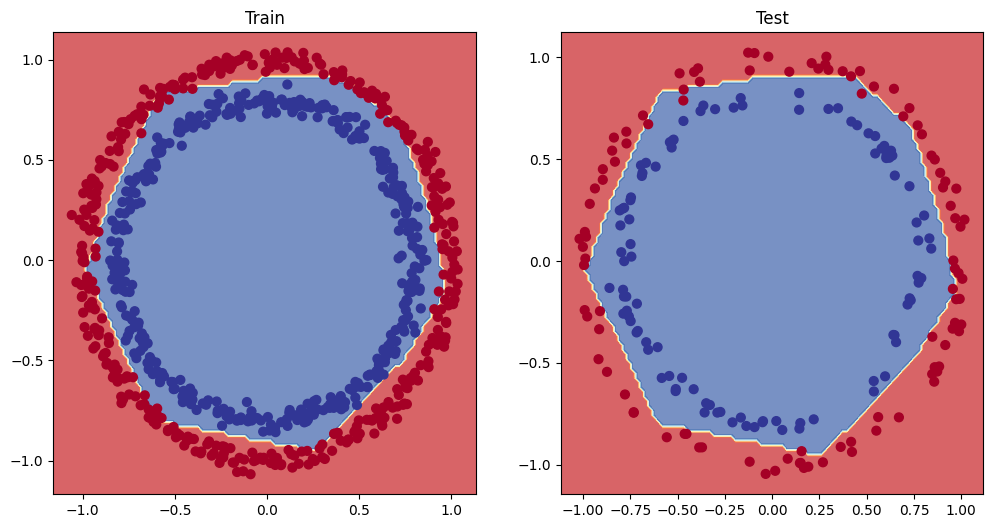

In [95]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)

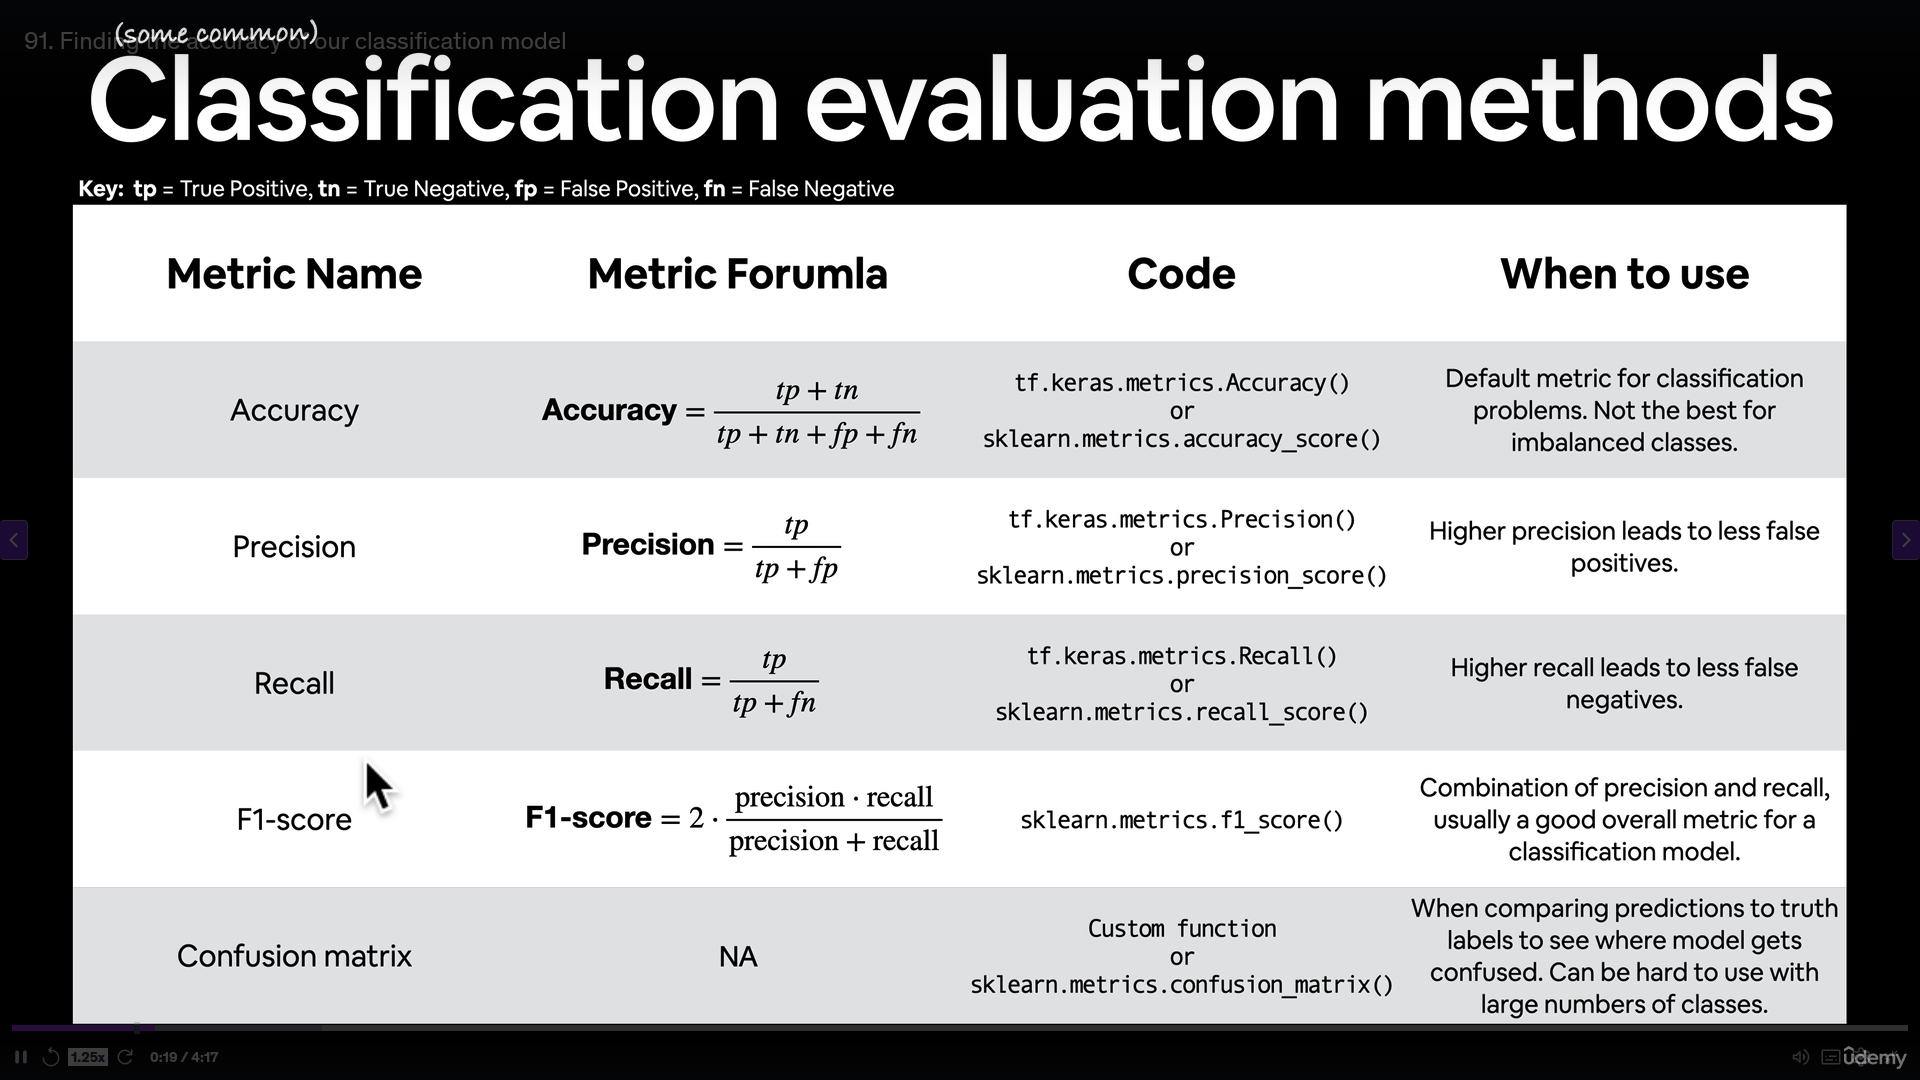

## More classification evaluation methods

Alongside visualizing our model's results as much as possible, there are a handful of other classification evaluation methods & metrics we should be familiar with:
* Accuracy
* Precision (high precision results in less false positive)
* Recall (high recall leads to less false negatives)
* F1-score
* Confusion Matrix
* Classification report (from scikit-learn)


In [96]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy * 100):.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9680 - loss: 0.1554 
Model loss on the test set: 0.14783863723278046
Model accuracy on the test set: 97.50


## How about a confusion matrix?


In [97]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_predictions = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [98]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [99]:
y_predictions[:10]

array([[0.8258933 ],
       [0.9767633 ],
       [0.881465  ],
       [0.9898673 ],
       [0.60329366],
       [0.03922043],
       [0.9897095 ],
       [0.0375    ],
       [0.775925  ],
       [0.34751108]], dtype=float32)

Oops... Looks like our predictions array has come out in **prediction probability** form... The standard output from the sigmoid (or softmax) activation functions.

In [100]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_predictions)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [101]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_predictions))

array([[96,  5],
       [ 0, 99]])

How about we prettify our confusion matrix?

*Note: The confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix function*

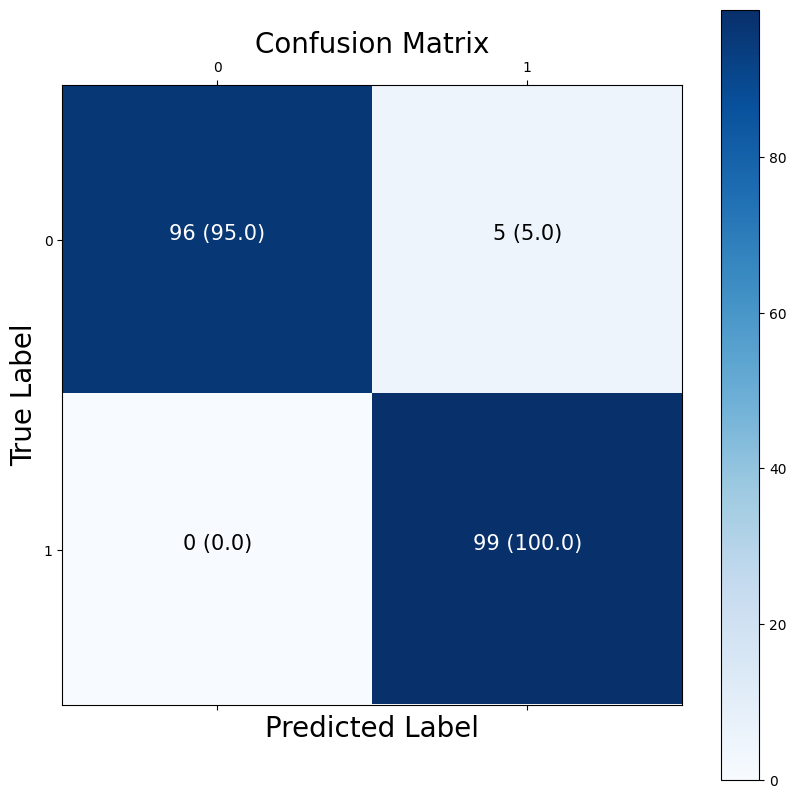

In [102]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_predictions))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom

# Adjsut label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on the each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f})",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a larger example (multiclass classification)

When we have more than two classes as an option, it's known as **multiclass classification**.
* This means if we have 3 different classes, it's multi-class classification.
* It also means if we have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a nueral network to classify images of different items of clothing.

In [103]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [104]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}")
print(f"Training label:\n{train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [105]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

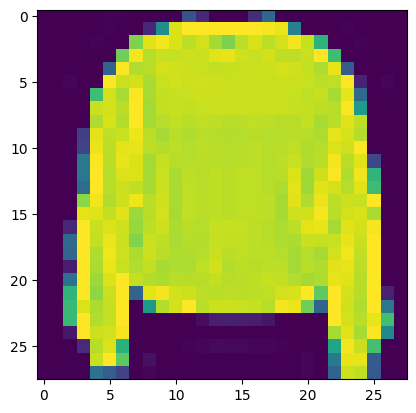

In [106]:
# Plot a single sample
import matplotlib.pyplot as plt

plt.imshow(train_data[7])

In [107]:
# Check out samples label
train_labels[7]

np.uint8(2)

In [108]:
# Create a small list so we can index onto our training labels so they're humean-readable
class_names = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Bag",
"Sneaker",
"Shirt",
"Ankle boot"]


In [109]:
class_names[train_labels[7]]

'Pullover'

Text(0.5, 1.0, 'T-shirt/top')

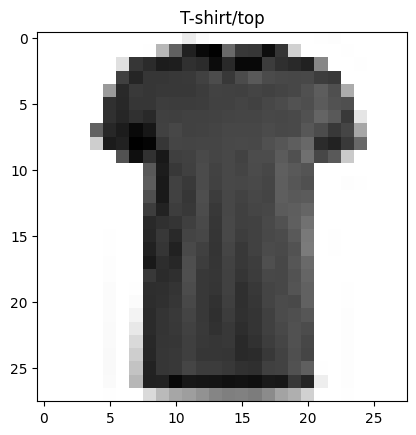

In [110]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

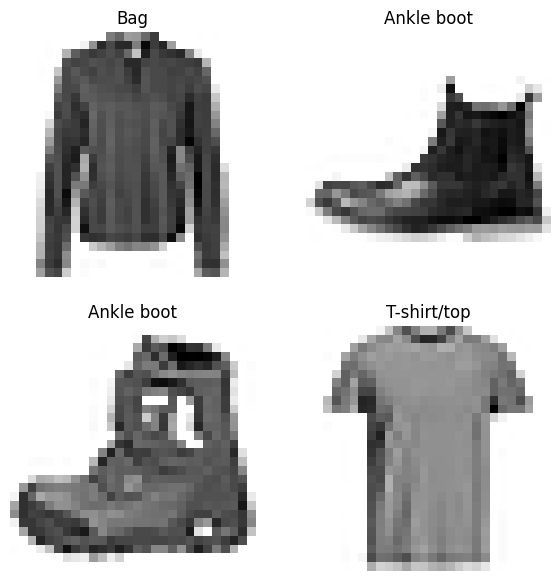

In [111]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  random_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[random_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[random_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similararchitecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If our data labels are one-hot encoded, use CatgoricalCrossentropy(), else use SparseCategoricalCrossentropy().
* Output layer activation = Softmax (not sigmoid)

In [112]:
train_data[0].shape

(28, 28)

In [113]:
len(class_names)

10

In [114]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [115]:
import tensorflow as tf
# Set random seed
tf.random.set_seed(42)

# 1. Build the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])

# 2. Compile the model
model_11.compile(loss="sparse_categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0985 - loss: 3.1858 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - 

In [116]:
# Check the model summary
model_11.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [117]:
# Check the min and max values of the data
train_data.min(), train_data.max()

(np.uint8(0), np.uint8(255))

Neural networks prefer dat to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [118]:
# We can get our training and testing data between 0 & 1 by dividing by the the maximum
train_data_normalized = train_data / (float)(train_data.max())
test_data_normalized = test_data / (float)(test_data.max())

# Check the min and max values of the scaled training data
train_data_normalized.min(), train_data_normalized.max()

(np.float64(0.0), np.float64(1.0))

In [119]:
# Set the random
tf.random.set_seed(42)

# 1. Build the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# 2. Compile the model
model_12.compile(loss="sparse_categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
normalized_history = model_12.fit(train_data_normalized,
             train_labels,
             validation_data=(test_data_normalized, test_labels),
             epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.4221 - loss: 1.5714 - val_accuracy: 0.6642 - val_loss: 0.9190
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6712 - loss: 0.8603 - val_accuracy: 0.7006 - val_loss: 0.7919
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7053 - loss: 0.7629 - val_accuracy: 0.7309 - val_loss: 0.7533
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7405 - loss: 0.7179 - val_accuracy: 0.7589 - val_loss: 0.6988
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7597 - loss: 0.6748 - val_accuracy: 0.7625 - val_loss: 0.6822
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7671 - loss: 0.6560 - val_accuracy: 0.7652 - val_loss: 0.6709
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7700 - loss: 0.6457 - val_accuracy: 0.7696 - val_loss: 0.6601
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7733 - loss: 0.6373 -

<Axes: title={'center': 'Normalized Data'}>

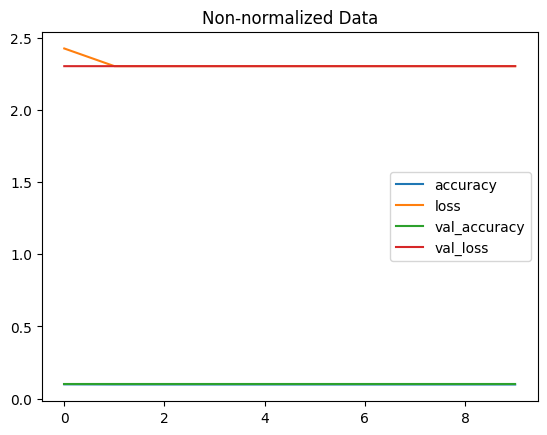

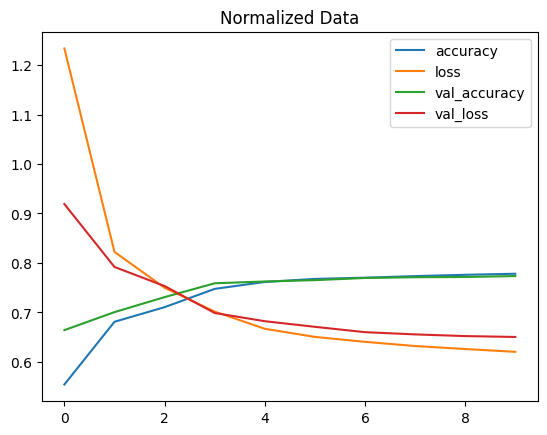

In [120]:
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")

# Plot normalized data loss curves
pd.DataFrame(normalized_history.history).plot(title="Normalized Data")

## Finding th eideal learning rate

In [121]:
# Set random seed
tf.random.set_seed(42)

# 1. Build the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# 2. Compile the model
model_13.compile(loss="sparse_categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Learning rate scheduler
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epochs: 1e-3 * (10 ** (epochs / 20)))

# 4. Fit the model
find_learning_rate_history = model_13.fit(train_data_normalized,
                                     train_labels,
                                     epochs=40,
                                     validation_data=(test_data_normalized, test_labels),
                                          callbacks=[learning_rate_scheduler])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4522 - loss: 1.4830 - val_accuracy: 0.7307 - val_loss: 0.7473 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7429 - loss: 0.7124 - val_accuracy: 0.7584 - val_loss: 0.6748 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7682 - loss: 0.6522 - val_accuracy: 0.7758 - val_loss: 0.6396 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7860 - loss: 0.6179 - val_accuracy: 0.7878 - val_loss: 0.6083 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7990 - loss: 0.5886 - val_accuracy: 0.7980 - val_loss: 0.5882 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8040 - loss: 0.5692 - val_accuracy: 0.8011 - val_loss: 0.5784 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8078 - l

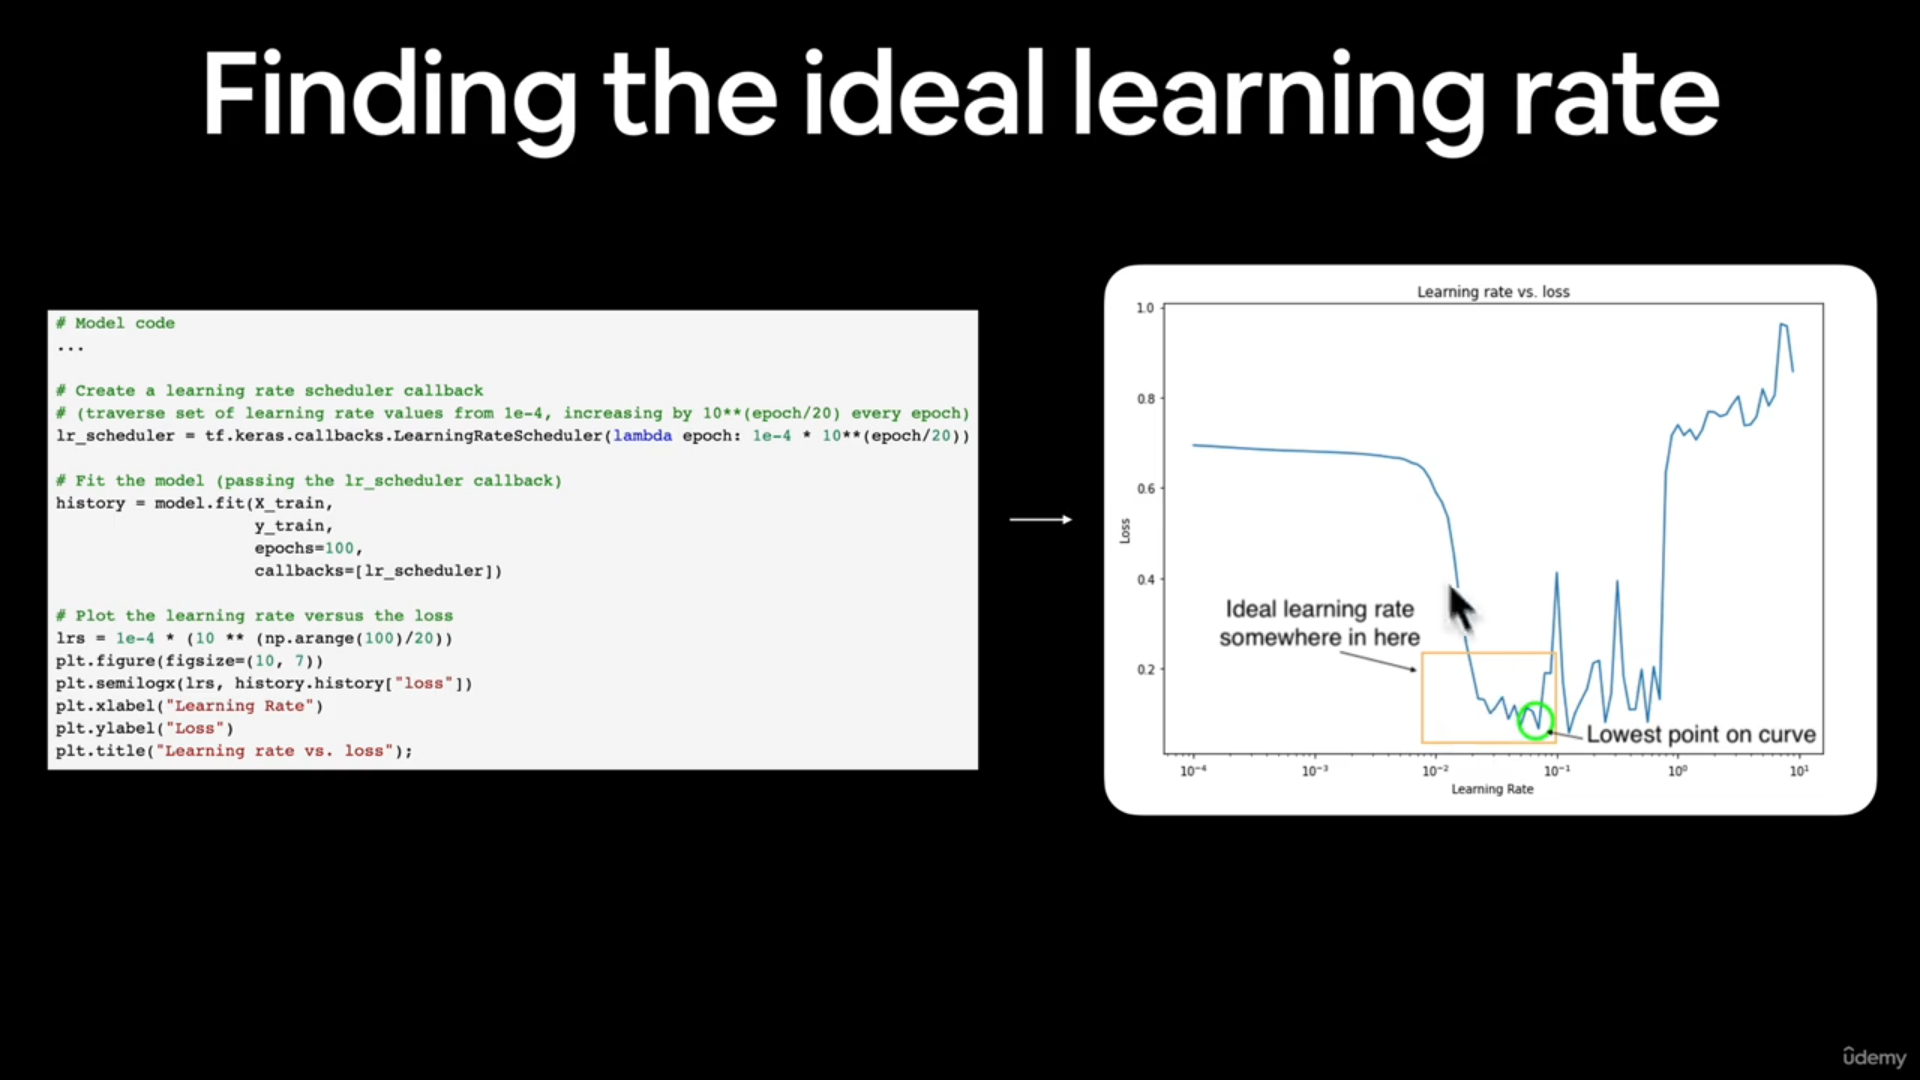

Text(0.5, 1.0, 'Finding the ideal leraning rate')

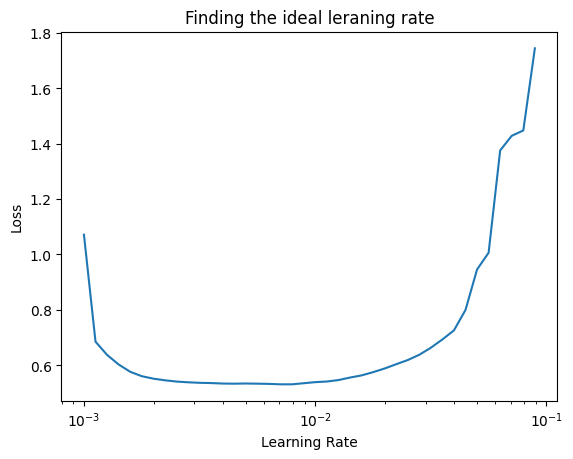

In [122]:
# Plot the leraning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 1e-3 * (10 ** (tf.range(40) / 20))
plt.semilogx(learning_rate, find_learning_rate_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal leraning rate")

In [123]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# 1. Build the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_14.compile(loss="sparse_categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
model_14.fit(train_data_normalized,
             train_labels,
             epochs=20,
             validation_data=(test_data_normalized, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3569 - loss: 1.5985 - val_accuracy: 0.7350 - val_loss: 0.7668
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7519 - loss: 0.7271 - val_accuracy: 0.7625 - val_loss: 0.7012
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7725 - loss: 0.6707 - val_accuracy: 0.7717 - val_loss: 0.6745
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7815 - loss: 0.6427 - val_accuracy: 0.7777 - val_loss: 0.6573
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7858 - loss: 0.6250 - val_accuracy: 0.7800 - val_loss: 0.6473
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7888 - loss: 0.6132 - val_accuracy: 0.7813 - val_loss: 0.6410
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7916 - loss: 0.6049 - val_accuracy: 0.7841 - val_loss: 0.6366
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7939 - loss: 0.5984 - 

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification mterics (such as confusion matrix)
* Assess some of its prediction (through visualization)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

In [124]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

figsize = (10, 10)

def make_confusion_matrix(y_true, y_prediction, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_prediction))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom

  # Adjsut label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on the each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f})",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [125]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Bag',
 'Sneaker',
 'Shirt',
 'Ankle boot']

In [126]:
# Make some predictions with our model
y_probabilities = model_14.predict(test_data_normalized) # probability is for prediction probability

# View the first 5 predictions
y_probabilities[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.15170816e-11, 5.42981632e-11, 8.00449360e-11, 3.05248886e-06,
        5.89373542e-07, 3.42474937e-01, 6.63516797e-09, 1.22163281e-01,
        1.37072813e-03, 5.33987403e-01],
       [5.00441529e-04, 3.09972734e-06, 9.13138330e-01, 3.32798265e-07,
        4.47635837e-02, 1.75300575e-28, 4.15941328e-02, 1.57469810e-26,
        1.58503582e-07, 1.80026031e-29],
       [2.84821108e-05, 9.95658576e-01, 3.00954585e-03, 8.68625466e-06,
        8.64338421e-04, 6.36658615e-06, 4.69851293e-05, 6.70676964e-05,
        3.09927156e-04, 3.00370839e-11],
       [2.40079171e-04, 9.91067469e-01, 5.66856330e-03, 1.10214147e-04,
        1.64166547e-03, 6.91215682e-05, 2.47368211e-04, 3.99030861e-04,
        5.56572108e-04, 2.81587553e-09],
       [1.44421011e-01, 1.70970423e-04, 1.40768811e-01, 1.10911414e-01,
        8.14460739e-02, 6.55539928e-11, 5.20216942e-01, 6.86460871e-13,
        2.06466136e-03, 4.62619960e-12]], dtype=float32)

In [127]:
y_probabilities[0], tf.argmax(y_probabilities[0]), class_names[tf.argmax(y_probabilities[0])]

(array([1.15170816e-11, 5.42981632e-11, 8.00449360e-11, 3.05248886e-06,
        5.89373542e-07, 3.42474937e-01, 6.63516797e-09, 1.22163281e-01,
        1.37072813e-03, 5.33987403e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [128]:
# Convert all of the prediction probabilities into integers
y_predictions = y_probabilities.argmax(axis=1)

# View the first 10 prediction labels
y_predictions[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [129]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [130]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_predictions)

array([[751,  24,  28,  90,   8,   3,  87,   0,   9,   0],
       [  1, 958,  11,  25,   4,   1,   0,   0,   0,   0],
       [ 22,  14, 661,  19, 206,   0,  72,   0,   6,   0],
       [ 52,  31,  13, 778,  37,  17,  60,   2,  10,   0],
       [  2,  13, 112,  28, 747,   0,  75,   0,  23,   0],
       [  0,   1,   0,   3,   0, 865,   0,  66,   8,  57],
       [172,  18, 135,  87, 184,   1, 388,   0,  15,   0],
       [  0,   0,   0,   0,   0,  27,   0, 943,   0,  30],
       [  2,   5,   4,  27,  41,  15,  15,   7, 884,   0],
       [  0,   0,   0,   1,   0,  24,   0,  58,   0, 917]])

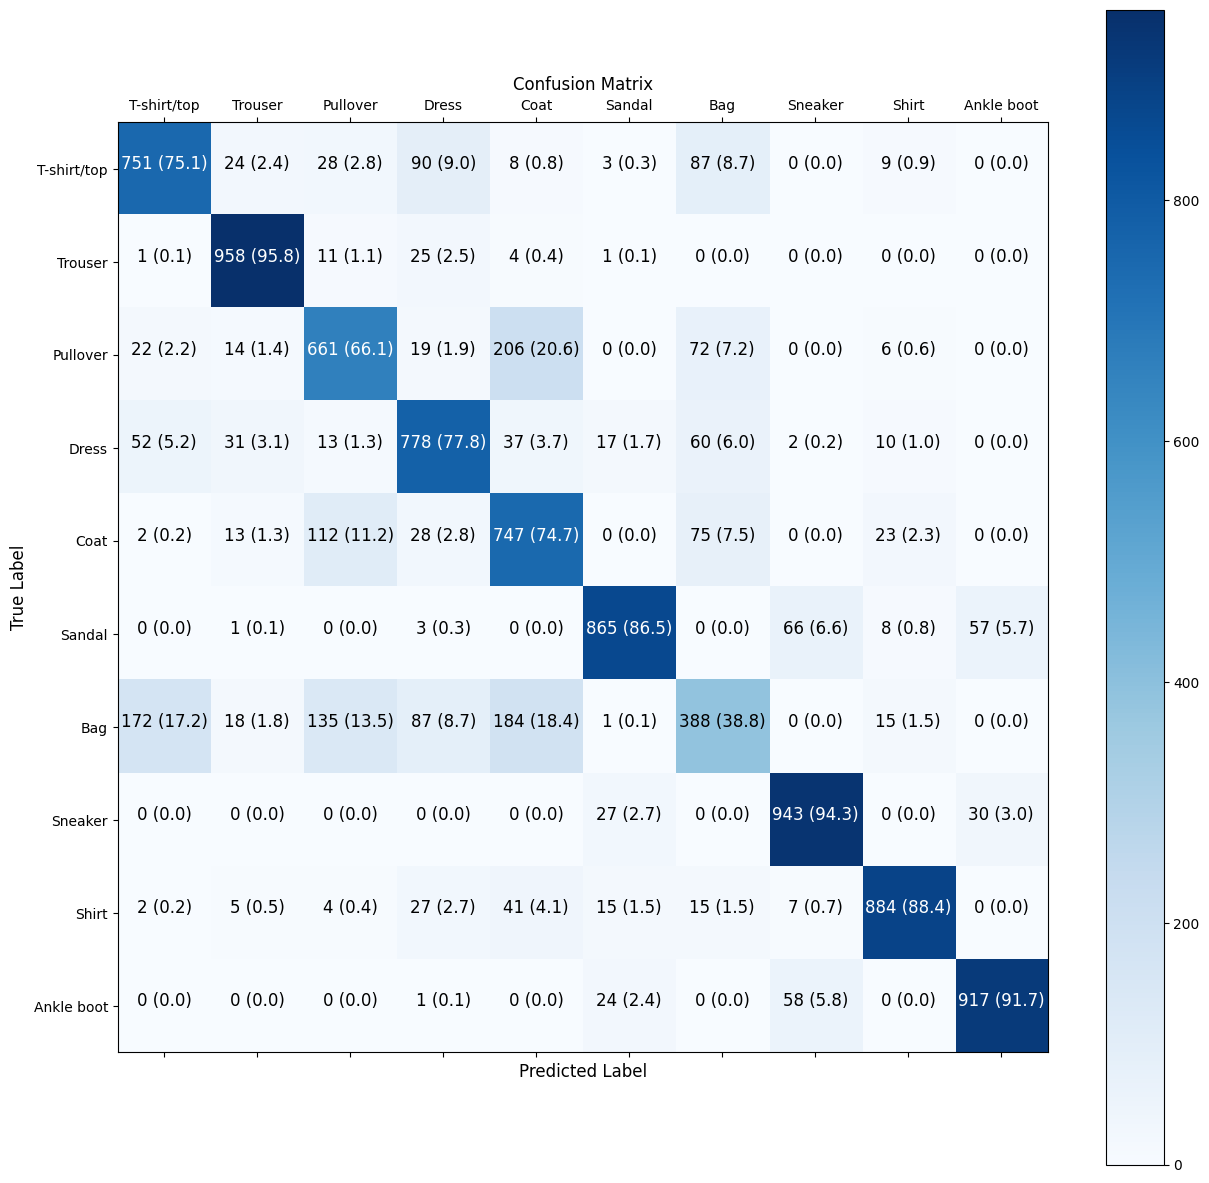

In [131]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_prediction=y_predictions,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=12)


How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [132]:
import random
def plot_random_image(model, images, true_labels, classes):

  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  # Set up a random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:.2f} (True: {})".format(pred_label,
                                                  100 * tf.reduce_max(pred_probs),
                                                  true_label),
            color=color) # set the color to green or red based on if prediction is right or wrong



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


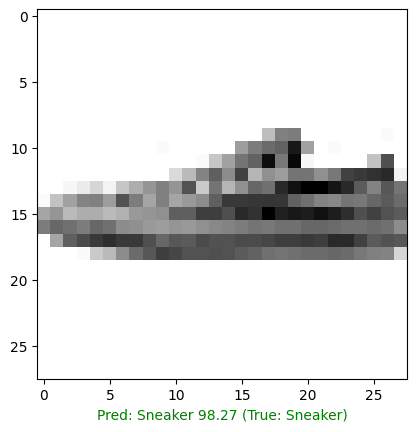

In [133]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_normalized,
                  true_labels=test_labels,
                  classes=class_names)

In [134]:
# Find the layers of our most recent model
model_14.layers

[<Flatten name=flatten_4, built=True>,
 <Dense name=dense_56, built=True>,
 <Dense name=dense_57, built=True>,
 <Dense name=dense_58, built=True>]

In [135]:
# Extract a particular layer
model_14.layers[1]

<Dense name=dense_56, built=True>

In [136]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.73445356,  0.06776962, -0.64916855,  0.8528288 ],
        [-0.13639879,  0.01571102, -0.56947684, -0.10250295],
        [-1.2635669 ,  0.05655152, -0.77261066,  1.3021756 ],
        ...,
        [-0.41820484, -0.06112733, -0.09792595,  0.1479205 ],
        [-0.26717573,  0.05592726, -0.10335572,  0.06653362],
        [-0.03243481, -0.03804413, -0.7528353 ,  0.23740837]],
       dtype=float32),
 (784, 4))

In [137]:
28 * 28

784

In [138]:
model_14.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

  Now let's check out the bias vector...


In [139]:
# Bias and biases' shapes
biases, biases.shape

(array([ 0.8549946 , -0.0247434 ,  0.29354823,  0.7791556 ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within corresponding weights matrix should influence the next layer.

In [139]:
model_14.summary()

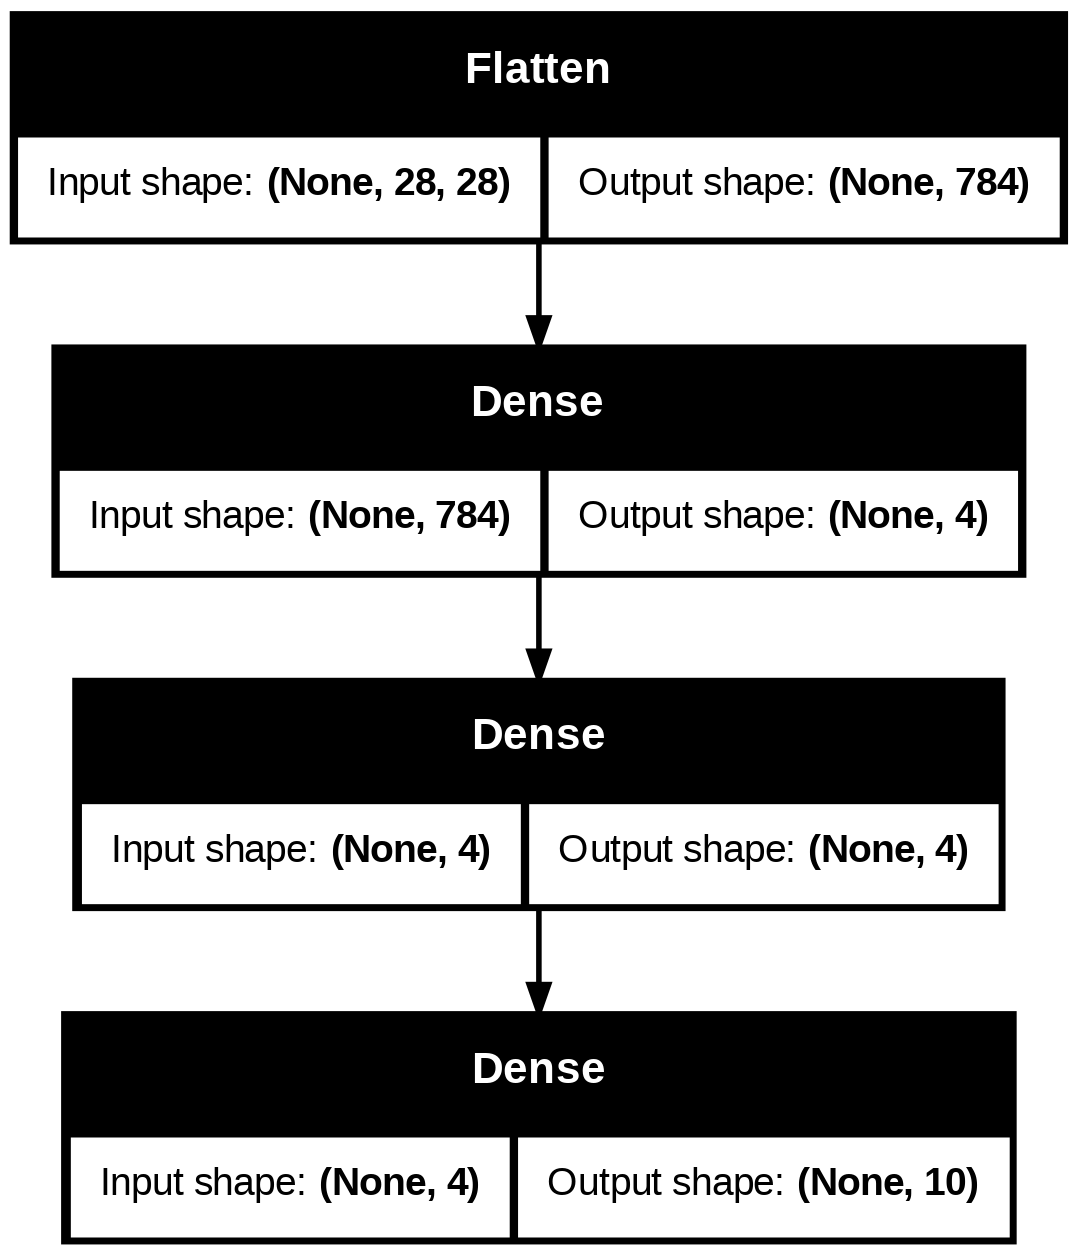

In [140]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)